# 1. Khám Phá Dữ Liệu

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
f= pd.read_csv("chemicals-in-cosmetics-3.csv")
f

,index,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,6,Titanium dioxide,06/17/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
1,1,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,65996-92-1,4,Distillates (coal tar),07/01/2009,07/01/2009,NaN,07/01/2009,07/01/2009,NaN,2
2,2,3,Glover's Medicated Shampoo,NaN,NaN,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),...,140-67-0,5,Estragole,07/01/2009,07/01/2009,NaN,07/02/2009,07/02/2009,NaN,2
3,3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,7,Titanium dioxide,07/09/2009,08/28/2013,NaN,07/09/2009,07/09/2009,NaN,1
4,4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,NaN,NaN,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),...,13463-67-7,8,Titanium dioxide,07/09/2009,08/28/2013,02/01/2011,07/09/2009,07/09/2009,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114293,114293,41445,JILLSTUART Something Pure Blue Diamond Glaze L...,NaN,NaN,1031,"KOS� America, Inc.",JILL STUART,44,Makeup Products (non-permanent),...,13463-67-7,67901,Titanium dioxide,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114294,114294,41446,JILLSTUART something pure blue my lips,NaN,NaN,1031,"KOS� America, Inc.",JILL STUART,44,Makeup Products (non-permanent),...,13463-67-7,67902,Titanium dioxide,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114295,114295,41449,SPRING BLOSSOM VANILLA APPLE BODY WASH,NaN,NaN,1388,Cosmopharm Ltd.,Careline,6,Bath Products,...,NaN,67905,Cocamide DEA,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1
114296,114296,41450,Wild Breeze Water Lilies Hand Soap,NaN,NaN,1388,Cosmopharm Ltd.,Careline,6,Bath Products,...,NaN,67906,Cocamide DEA,04/30/2020,04/30/2020,NaN,04/30/2020,04/30/2020,NaN,1


## a.Các cột kiểu dữ liệu Numberic

In [5]:
numberic_cols = []
for i in f.columns:
     if (f[i].dtypes==int or f[i].dtypes== float):
            numberic_cols.append(i)
numberic_cols

['index',
 'CDPHId',
 'CSFId',
 'CompanyId',
 'PrimaryCategoryId',
 'SubCategoryId',
 'CasId',
 'ChemicalId',
 'ChemicalCount']

## b. Tỉ lệ giá trị thiếu, min max

In [ ]:
index = ["missing_values","missing_ratio", "min", "max"]

maxValue = []
for i in numberic_cols:
    maxValue.append(f[i].max())

minValue = []
for i in numberic_cols:
    minValue.append(f[i].min())
    
missing_ratio = []
for i in numberic_cols:
    missing_ratio.append(missingRatio(f[i]))

missing_values = []
for i in numberic_cols:
    missing_values.append(missingValues(f[i]))
    
def missingValues(s):
    temp = s.isna()
    return len(temp[temp==True])
def missingRatio(s):
    temp = s.isna()
    return round((len(temp[temp==True])/len(s))*100,3)

data = [missing_values,missing_ratio,minValue,maxValue]
numberic_col_profiles = pd.DataFrame(data,index,numberic_cols)

In [12]:
numberic_col_profiles

,index,CDPHId,CSFId,CompanyId,PrimaryCategoryId,SubCategoryId,CasId,ChemicalId,ChemicalCount
missing_values,0.0,0.0,33916.000,0.0,0.0,0.0,0.0,0.0,0.0
missing_ratio,0.0,0.0,29.673,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,2.0,1.000,4.0,1.0,3.0,2.0,0.0,0.0
max,114297.0,41451.0,64883.000,1391.0,111.0,172.0,1242.0,67907.0,9.0


# 2.Trả Lời Câu hỏi

##  Top 5 Các brand có nhiều sản phẩm nhất

In [21]:
top5_brand = f["BrandName"].value_counts().to_frame("counts").head()
top5_brand

,counts
SEPHORA,3394
NYX,3227
bareMinerals,3158
Revlon,2335
Charlotte Tilbury,2297


<AxesSubplot:ylabel='Tên Nhãn Hàng'>

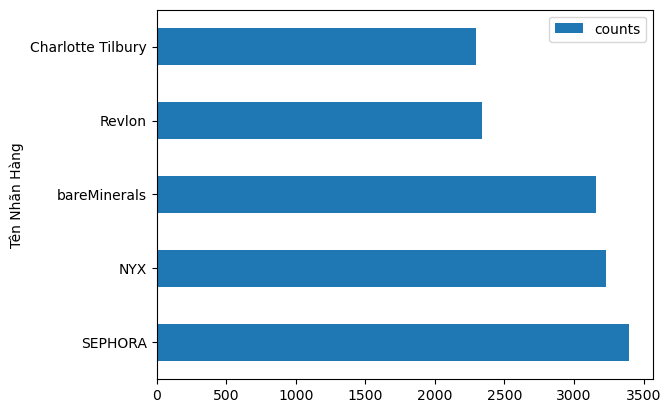

In [29]:
top5_brand.plot.barh(ylabel="Số lượng sản phẩm",xlabel="Tên Nhãn Hàng")

- Đây là 5 nhãn hàng mĩ phẩmcó nhiều sản phẩm nhất
- Đứng đầu là SEPHORA và thứ 5 là Charlotte Tilbury
- Có thể thấy SEPHORA,NYX,bareMinerals là các nhãn hàng có nhiều sản phẩm nhất và chênh lệch số lượng sản phẩm giữa 3 nhãn hàng này là không nhiều.
- Sau top 3 thì có sự chênh lệch khá đáng kể khoảng 800-1000 sản phẩm ở 2 vị trí tiếp theo là Revlon và Charlotte Tilbury
